In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-03-16 15:39:34.092744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing
# x_train_scaled = x_train/255
# x_test_scaled = x_test/255
pixel_means = x_train.mean(axis=0, keepdims=True)
pixel_stds = x_train.std(axis=0, keepdims=True)
x_train_scaled = (x_train-pixel_means)/pixel_stds
x_test_scaled = (x_test-pixel_means)/pixel_stds

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


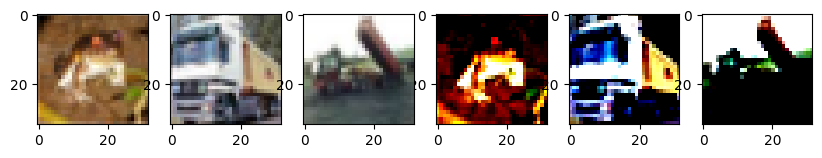

In [3]:
N = 3
plt.figure(figsize=(10,10))
for i in range(N):
    xi_image = x_train[i].reshape(32, 32, 3)
    ax = plt.subplot(2, 2*N, i+1)
    ax.imshow(xi_image)
    
    xi_image_scale = x_train_scaled[i].reshape(32, 32, 3)
    ax = plt.subplot(2, 2*N, i+N+1)
    ax.imshow(xi_image_scale)

plt.show()

In [4]:
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(units=300, activation='selu', kernel_initializer='lecun_normal'), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=200, activation='selu', kernel_initializer='lecun_normal'), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=10, activation='softmax')
])

2023-03-16 15:39:38.020522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 15:39:38.039674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 15:39:38.039762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-16 15:39:38.040123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [6]:
opt = keras.optimizers.Adam(learning_rate=.01, beta_1=.9, beta_2=.999)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
train = model.fit(x_train_scaled, y_train,
                  epochs=10,
                  validation_split=0.2)

Epoch 1/10


2023-03-16 15:39:40.486349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-16 15:39:40.487988: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fc25381c580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-16 15:39:40.488001: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-16 15:39:40.491044: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-16 15:39:40.567357: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 [==============================] - 9s 6ms/step - loss: 1.7641 - accuracy: 0.3633 - val_loss: 1.6023 - val_accuracy: 0.4338
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5481 - accuracy: 0.4487 - val_loss: 1.4931 - val_accuracy: 0.4685
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4601 - accuracy: 0.4769 - val_loss: 1.4570 - val_accuracy: 0.4859
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4023 - accuracy: 0.5019 - val_loss: 1.4241 - val_accuracy: 0.4894
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3454 - accuracy: 0.5214 - val_loss: 1.3925 - val_accuracy: 0.5050
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2989 - accuracy: 0.5375 - val_loss: 1.3709 - val_accuracy: 0.5200
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2522 - accuracy: 0.5552 - val_loss: 1.3628 - val_accuracy: 0.5186
Epo

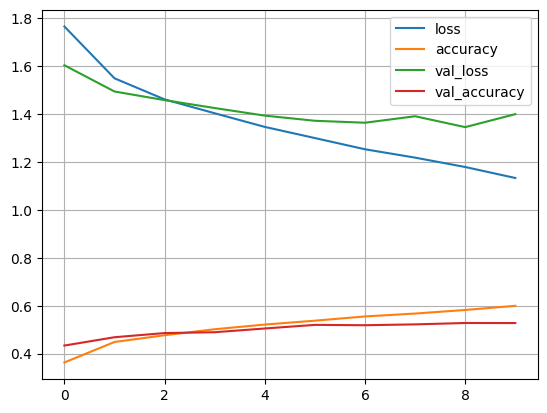

In [8]:
import pandas as pd
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [9]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.3735 - accuracy: 0.5276


[1.373534917831421, 0.5275999903678894]